# Algoritma Pemrograman II
## Web Data Acquisition
-------------------------
Ridho Pandhu Afrianto

162112133062


In [44]:
import requests
import csv
import scrapy
from bs4 import BeautifulSoup

> Mengimport semua library yang dibutuhkan 

# Nomor 1

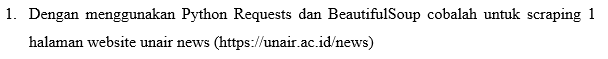

## Python Requests Method


In [41]:
url = 'https://unair.ac.id/news'
response = requests.get(url)
response.text


'<!DOCTYPE html>\n<html lang="id-ID">\n<head>\n\t<meta charset="UTF-8">\n\t\t<meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' />\n<link rel="alternate" hreflang="id" href="https://www.unair.ac.id/news/" />\n<link rel="alternate" hreflang="en" href="https://www.unair.ac.id/en/unair-news/" />\n<link rel="alternate" hreflang="x-default" href="https://www.unair.ac.id/news/" />\n\n\t<!-- This site is optimized with the Yoast SEO plugin v19.6.1 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<title>UNAIR NEWS - Universitas Airlangga Official Website</title>\n\t<link rel="canonical" href="https://www.unair.ac.id/news/" />\n\t<meta property="og:locale" content="id_ID" />\n\t<meta property="og:type" content="article" />\n\t<meta property="og:title" content="UNAIR NEWS - Universitas Airlangga Official Website" />\n\t<meta property="og:description" content="UNAIR TV Untuk Jurnalis UNAIR Good News Tentang Kami Berita Terkini Lihat Sem



*   Melakukan `requests.get()` pada `url` yang dituju untuk mendapatkan respon pada web yang dituju.
*   `.text` digunakan agar dapat menunjukkan source code berupa text yang sudah dideklarasikan dalam variabel `response`



## Beautiful Soup Method


In [39]:

data = response.text 
soup = BeautifulSoup(data, 'html.parser')
for i in soup.find_all('a'):
  print(i.get('href'))


https://www.unair.ac.id
https://www.unair.ac.id/
#elementor-action%3Aaction%3Dpopup%3Aopen%26settings%3DeyJpZCI6MTIyMzE4LCJ0b2dnbGUiOmZhbHNlfQ%3D%3D
#elementor-action%3Aaction%3Dpopup%3Aopen%26settings%3DeyJpZCI6NzMyLCJ0b2dnbGUiOmZhbHNlfQ%3D%3D
https://ppmb.unair.ac.id/
https://www.unair.ac.id/mahasiswa/
https://www.unair.ac.id/dosen-staf/
https://ppmb.unair.ac.id/
https://www.unair.ac.id/mahasiswa/
https://www.unair.ac.id/dosen-staf/
https://www.unair.ac.id
http://alumni.unair.ac.id/
https://www.unair.ac.id/orang-tua-2/
https://cybercampus.unair.ac.id/
http://alumni.unair.ac.id/
https://www.unair.ac.id/orang-tua-2/
https://cybercampus.unair.ac.id/
#
https://www.unair.ac.id/en/unair-news/
https://www.unair.ac.id/tentang-unair-selayang-pandang/
https://www.unair.ac.id/pendidikan/
https://www.unair.ac.id/tentang-unair-selayang-pandang/
https://www.unair.ac.id/pendidikan/
https://www.unair.ac.id/penelitian/
https://www.unair.ac.id/pengabdian-2/
https://www.unair.ac.id/penelitian/
https://



*   Dari hasil response tadi, dimasukkan ke dalam variabel `data` agar lebih mudah diproses dalam `BeautifulSoup()`
*   Kemudian melakukan pendeklarasian variabel `soup` yang berisi fungsi dari `BeautifulSoup()` yang memiliki argumen `data` dan juga `html.parser`
*   `for` loop dikombinasikan dengan `soup.find_all()` untuk mencari elemen yang ingin dicari, dalam hal ini adalah `a` yang kemudian akan mencari `href` dengan `get('href')`



# Nomor 2

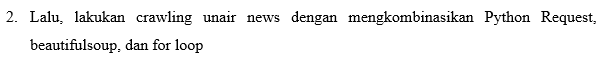

## Deklarasi link tujuan dan list yang Dibutuhkan

In [ ]:
url2 = "https://www.unair.ac.id/category/berita/"

linkers = []
berita = []
linkers.append(url2)




*   `url2` berisi link tujuan yaitu unair news
*   list `linkers` berisi kumpulan link yang akan ditelusuri satu persatu
*   list `berita` berisi kumpulan judul yang sudah di-extract dari tiap link
*   Kemudian melakukan `append` pada `linkers` yang berisi `url2` agar memiliki starting point untuk `for` loop di bawah ini.



## For loop untuk mengisi list `linkers`

In [ ]:
for i in linkers:
  datafluid = requests.get(i).text
  soupfluid = BeautifulSoup(datafluid, 'html.parser')

  for rawlink in soupfluid.find_all("a", class_="page-numbers"):
    newlink = rawlink.get('href')
    if newlink not in linkers :
      linkers.append(newlink)



*   Untuk setiap elemen di dalam `linkers`, kirim `requests` yang akan diproses dengan format `.text` dan kemudian dimasukkan dalam `datafluid`.
*   Selanjutnya, menggunakan fungsi `BeautifulSoup()` yang memiliki argumen `datafluid` dan `html.parser`
-------
*   Di dalam `for` loop tersebut, terdapat `for` loop yang berfungsi untuk menelusuri hal yang dibutuhkan. Hal ini dilakukan dengan `find_all("a", class_="page-numbers")`. 

  *   Maksud dari `find_all()` disini adalah program mencari setiap tag `a` yang ada pada class `page-numbers`

*   Kemudian program dapat mengambil link yang ada pada class tersebut dengan `.get('href')` dan dimasukkan ke dalam variabel `newlink`
*   Proses terakhir adalah untuk mengecek apakah link tersebut sudah ada pada list `linkers` atau belum. Jika belum, maka link tersebut dimasukkan ke dalam list `linkers`
        Hal ini dimaksudkan agar tidak ada link yang berduplikat










## For loop untuk mengisi list `berita`

In [ ]:
for titles in linkers:
    scraper = requests.get(titles).text
    soups = BeautifulSoup(scraper, 'html.parser')

    for judul in soups.find_all('h3' , class_="elementor-post__title"):
      namaberita = judul.text.strip()
      if namaberita not in berita:
        berita.append(namaberita)


*   Selanjutnya, untuk menambahkan setiap nama berita, program perlu mengunjungi tiap-tiap link yang berada dalam list `linkers`
*   Program melakukan scraping pada tiap link yang baru dengan fungsi `BeautifulSoup()` baru yang diberi nama `soups` dengan argumen `scraper` yang memiliki value berupa link yang ada pada `linkers` tadi
-----
*   Kemudian untuk mencari yang dibutuhkan, program memerlukan `for` loop lain dengan `find_all()` yang berisi argumen `h3` dalam class `elementor-post__title`
*   Variabel `namaberita` digunakan untuk menyimpan nilai berupa `text` dari hasil `BeautifulSoup()` di atas, kemudian melakukan `.strip()` untuk menghilangkan spasi dan lainnya.
* Yang terakhir, jika elemen dari `namaberita` masih belum ada dalam `berita`, maka elemen tersebut dimasukkan dalam list `berita`





## Memasukkan elemen dalam list `berita` ke dalam `.csv`


In [38]:
i = 1

with open('beritaunair.csv' ,'w' , newline='') as f:
  tulis = csv.writer(f)

  tulis.writerow(['index','judul_berita'])
  for e in berita:
    tulis.writerow([i, e])
    i += 1





*   `i = 1` digunakan sebagai numerator index yang nantinya akan di-apply dalam `.csv`
*   Dalam fungsi `open()` terdapat argumen nama file yaitu `beritaunair.csv` dan juga `w` yang berguna untuk memberi akses untuk melakukan write. 

*   Fungsi `csv.write()` terdapat dalam library `csv` dan dimasukkan dalam variabel `tulis`

*  Syntax `tulis.writerow(['index','judul_berita'])` digunakan untuk menuliskan nama kolom atau header

*  `for` loop digunakan untuk menuliskan setiap item yang ada pada list `berita`. Untuk menuliskan indexnya hanya perlu menambahkan `i` yang sudah dideklarasikan pada awal tadi, kemudian melakukan `i +=1` pada akhir `for `loop agar nilai index tersebut bertambah.



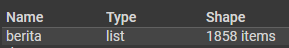

    * Bukti bahwa semua judul berita berhasil tersimpan pada list `berita`



# Nomor 3


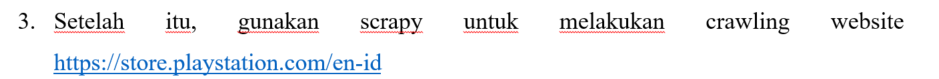

In [ ]:
class TestSpider(scrapy.Spider):
    name = "testing"

    start_urls = [
        'https://store.playstation.com/en-id/category/f44fdcbf-a390-4543-962b-ad929bbf213c/'
    ]

    def parse(self, response):
        num_page=response.css('span.psw-fill-x::text')[-1].get()
        num_page=int(num_page)

        url = response.url

        for next in range(1, num_page+1):
            yield scrapy.Request(url=url+str(next), callback=self.parse_games)

    def parse_games(self, response):
        for items in response.css('.psw-product-tile__details'):
            yield{
                'title': items.css('.psw-t-body::text').get(),
                'price': items.css('.psw-price .psw-m-r-3::text').get()
            }
        



*   Pada kasus kali ini, program menggunakan library `scrapy` untuk melakukan crawling website
*   Kemudian mendeklarasikan nama dari scrapy tersebut, dalam kasus ini diberi nama `"testing"`
*   Variabel `start_urls` berisi root url dari link yang akan dilakukan crawling
-------------------
*   Terdapat fungsi `parse()` yang berfungsi untuk mencari url menuju page selanjutnya.
*   Karena PSN Store tidak menyediakan `href`, maka yang dapat dilakukan adalah memanipulasi value yang digunakan untuk berpindah page. Hal ini dapat dilakukan dengan :

          num_page=response.css('span.psw-fill-x::text')[-1].get()
          num_page=int(num_page)
*   Dimana `[-1]` adalah code untuk mengambil urutan terakhir dalam string yang dalam kasus PSN Store kali ini, itu adalah value yang digunakan untuk berpindah page.

*   Untuk berpindah page, program memerlukan `for` loop yang memiliki `range()` sebesar `num_page+1` agar semua value yang ada dapat ditelusuri

*   `yield` berguna untuk melakukan mengeksekusi proses yang ada di dalamnya sementara menghentikan proses yang sedang berjalan. Inilah syntax yang digunakan untuk menelusuri link-link baru yang sudah tersedia. `yield` ini akan dihubungkan dengan fungsi `parse_games()` dengan `callback=self.parse_games`

----------


*   Fungsi `parse_games()` berguna untuk menelusuri setiap game yang ada pada satu halaman 
*   Untuk mencari games yang ada pada halaman tersebut, diperlukan adanya selector yaitu `response.css()` yang berisi class dari detail game tersebut. Dalam kasus ini class itu adalah `sw-product-tile__details`
*   Kemudian, lakukan `yield` yang berisi hal-hal yang ingin dicari. Untuk kasus ini, yang dicari adalah `price` dan `title`, dimana :     

       *   Selector untuk judul adalah `.psw-t-body` kemudian diberi `::text` untuk hanya mengambil text saja.

       *   Selector untuk harga adalah `.psw-price .psw-m-r-3` kemudian diberi `::text` untuk mengambil tulisannya saja.

-----------

Program akan kembali mengulang dari `for` loop atas hingga menemui ujung page






# Nomor 4


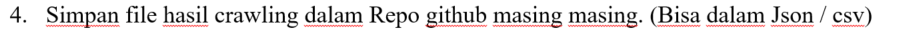

https://github.com/reiness/code-ing/tree/main/web-data-acquisition